<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/Ejercicios_Strogatz_cap_2.2_pares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nonlinear Dynamics and Chaos - Strogatz, S.H.
## Ejercicios Pares Capítulo 2.2 - Puntos fijos y estabilidad 
### Jorge Andrés Noreña García - 816543

En matemáticas , teoría de la estabilidad se refiere a la estabilidad de las soluciones de las ecuaciones diferenciales y de trayectorias de sistemas dinámicos bajo pequeñas perturbaciones de las condiciones iniciales.

En este cuaderno, vamos a desarrollar las ecuaciones con los métodos de Euler y  de Runge Kutta de cuarto orden y se mostrará la comparación entre los métodos. En este repositorio, hay un archivo dedicado especificamente al estudio y ejecución de cada método, por ello, se invita (en caso tal de su desconocimiento) a observar primero dichos documentos.

Para comenzar, definimos las ecuaciones que se van a evaluar.

##### Ejercicio 2.2.2: 
\begin{equation}
\dot { x } =1-{ x }^{ 14 }
\end{equation}

##### Ejercicio 2.2.4: 
\begin{equation}
\dot { x } ={ e }^{ -x }-sin(x)
\end{equation}

##### Ejercicio 2.2.6: 
\begin{equation}
\dot { x } =1-2cos(x)
\end{equation}


In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#Definimos el método de Runge Kutta de cuarto orden

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x


# Definimos el método de Euler 

def euler( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*func(ti,xi,params)
      ti = ti + h
    return t, x

In [ ]:


def sistema2(t, x, a):
    x_dot = 1-(x**14)
    return x_dot

    
def sistema4(t, x, a):
    x_dot = (np.e**-x)*np.sin(x)
    return x_dot


def sistema6(t, x, a):
    x_dot = 1-(2*np.cos(x))
    return x_dot


def decimal_range(start, stop, increment):
    while start < stop:
        yield start
        start += increment
    


### Sistema 2: 

2. \begin{equation}
\dot { x } =1-{ x }^{ 14 }
\end{equation}

Se observa que el sistema tiene dos puntos fijos, uno estable ubicado en $-1$ y otro inestable ubicado en $1$


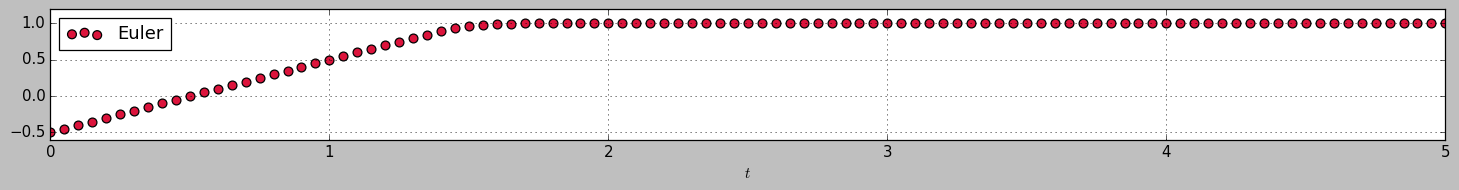

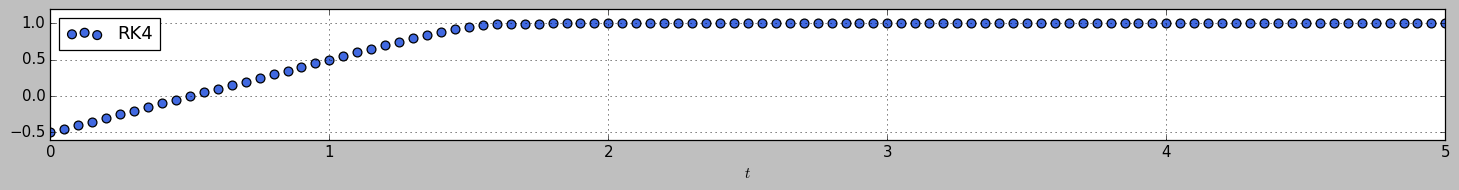

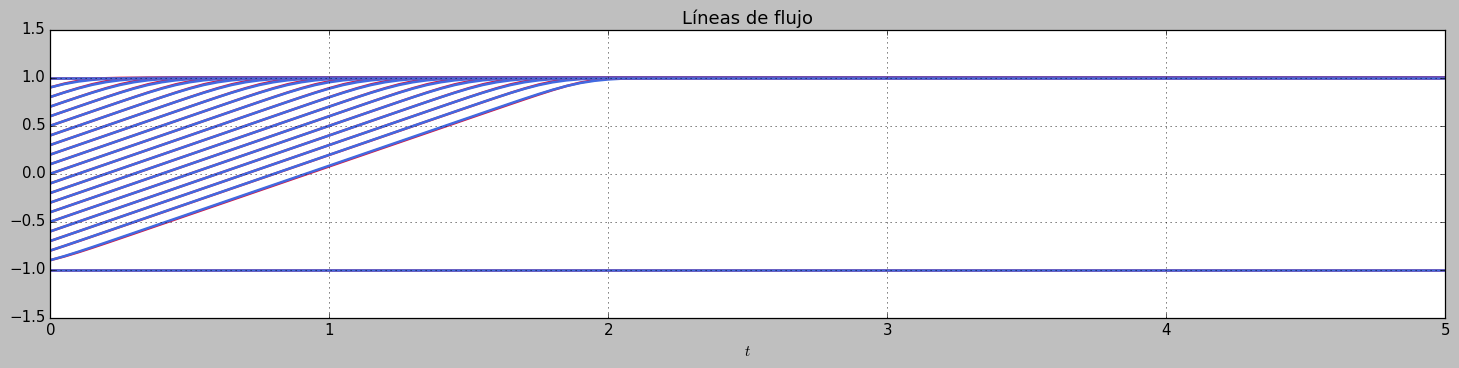

In [ ]:
h = 0.05
ti = 0
tf = 5
x0 = -0.5
a = 1 

t1,x1 = euler( sistema2, h, ti, tf, x0, a )
t2,x2 = rk4( sistema2, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema2, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema2, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()


### Sistema 4: 

4. \begin{equation}
\dot { x } ={ e }^{ -x }-sin(x)
\end{equation}

Se observa que el sistema tiene dos puntos fijos, uno estable que se ubica en $(2k-1)\pi$  (valores impares de $\pi$) , y uno inestable en $2k\pi$ (valores pares de $\pi$) , donde $k \in N$.   

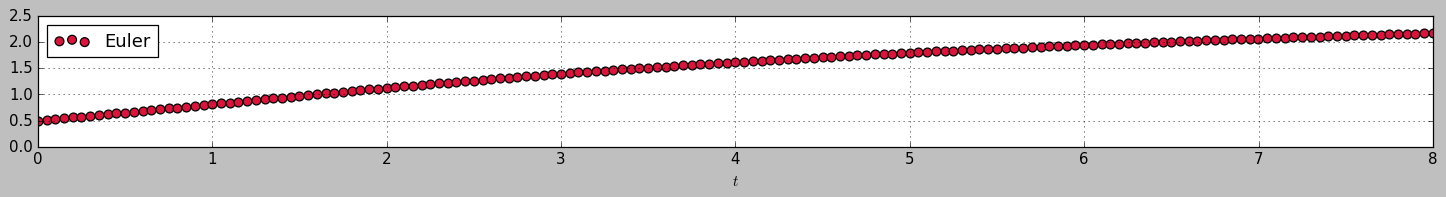

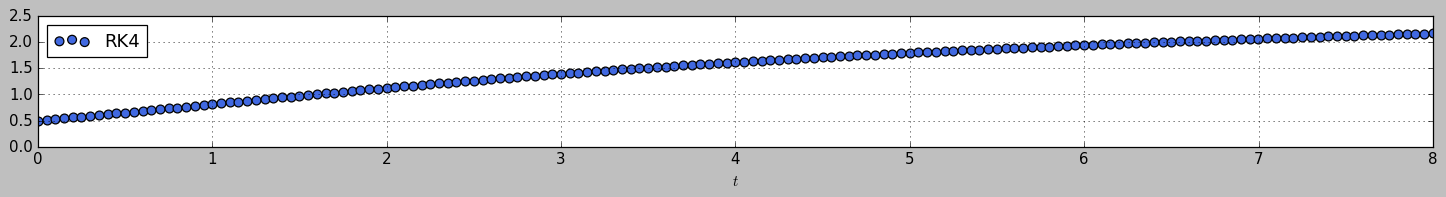

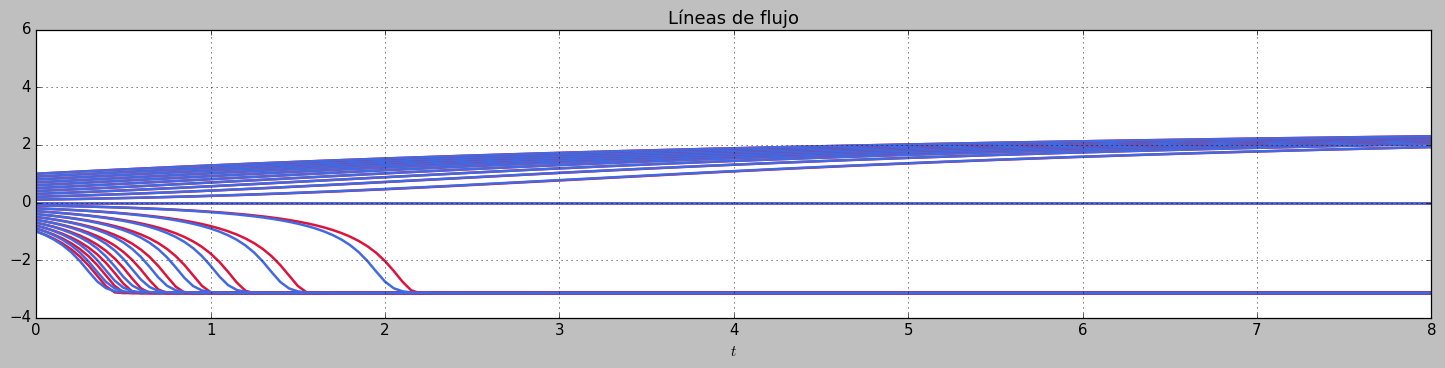

In [ ]:
h = 0.05
ti = 0
tf = 8
x0 = 0.5
a = 1 

t1,x1 = euler( sistema4, h, ti, tf, x0, a )
t2,x2 = rk4( sistema4, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-1,1,0.1):
    x0=i
    t1,x1 = euler( sistema4, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema4, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-4, 6])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()


### Sistema 6: 

6. \begin{equation}
\dot { x } =1-2cos(x)
\end{equation}


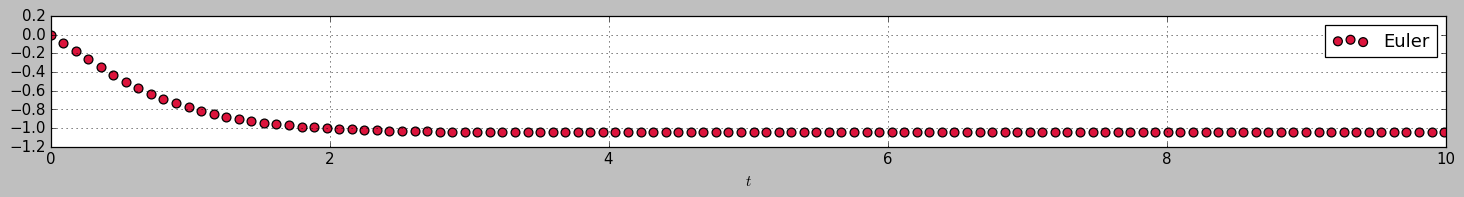

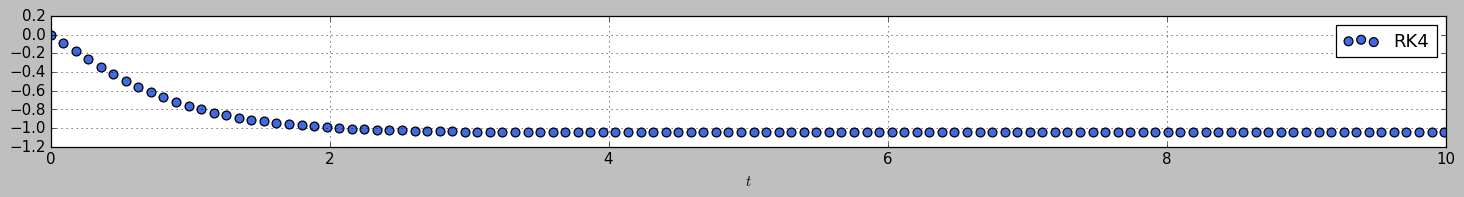

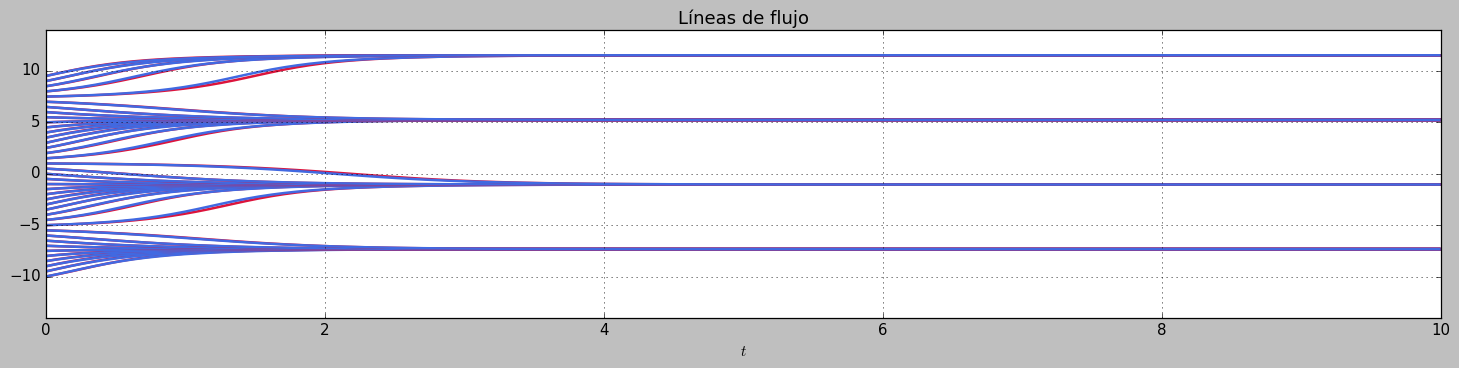

In [ ]:
h = 0.09
ti = 0
tf = 10
x0 = 0
a = 10 

t1,x1 = euler( sistema6, h, ti, tf, x0, a )
t2,x2 = rk4( sistema6, h, ti, tf, x0, a )

#Plot Para la gráfica generada por el método de Euler 
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(211)
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

#Plot para la gráfica generada por el método de RK4
plt.figure(figsize=(20, 4), dpi=90)
plt.subplot(212)
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)
plt.legend(loc = 'best')
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

#Líneas de flujo RK4 y Euler.
plt.figure(figsize=(20, 4), dpi=90)
plt.title('Líneas de flujo')

for i in decimal_range(-10,10,0.5):
    x0=i
    t1,x1 = euler( sistema6, h, ti, tf, x0, a )
    plt.plot( t1, x1, c = 'crimson', label = 'Euler', linewidth = 2)
    t2,x2 = rk4( sistema6, h, ti, tf, x0, a )
    plt.plot( t2, x2, c = 'royalblue', label = 'RK4', linewidth = 2)

plt.xlim([0, tf])
plt.ylim([-14, 14])
plt.xlabel(r'$t$')
plt.legend
plt.grid()
plt.show()
